In [137]:
import numpy as np
import pandas as pd
import json

import re

pd.options.display.max_columns = 1000

In [226]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [87]:
df = pd.read_csv('./data/card_meta.csv')

In [164]:
card_names = """{
  BOACF4: {
    name: '신한카드 혼디모앙',
    smrtt: '제주혜택 한데 모아, 모두 모아',
    url: '/pconts/html/card/apply/credit/1200745_2207.html',
    svcInfo1: '제주도 어디서나 최대 0.8% 적립',
    svcInfo2: '제주도민 맞춤 영역 3~30% 적립',
    svcInfo3: '온라인 쇼핑 2,500원 할인',
    id: 'BOACF4',
    img: '/pconts/images/contents/card/plate/cdCreditBOACF4_1.png'
  },
  AOBCB6: {
    name: '신한카드 The More(더모아)',
    smrtt: '포인트 재테크로 자산을 더 모으는 방법! 신한카드 The More',
    url: '/pconts/html/card/apply/credit/1198942_2207.html',
    svcInfo1: '전 가맹점 1천원 미만 금액 포인트 적립',
    svcInfo2: '특별 적립 가맹점 더블 포인트 적립',
    svcInfo3: '적립 포인트 재투자(신한은행/신한금융투자)',
    id: 'AOBCB6',
    img: '/pconts/images/contents/card/plate/cdCreditAOBCB6s.png'
  },
  AOBCB7: {
    name: '신한카드 The More(더모아)',
    smrtt: '포인트 재테크로 자산을 더 모으는 방법! 신한카드 The More',
    url: '/pconts/html/card/apply/credit/1198942_2207.html',
    svcInfo1: '전 가맹점 1천원 미만 금액 포인트 적립',
    svcInfo2: '특별 적립 가맹점 더블 포인트 적립',
    svcInfo3: '적립 포인트 재투자(신한은행/신한금융투자)',
    id: 'AOBCB7',
    img: '/pconts/images/contents/card/plate/cdCreditAOBCB6s.png'
  },
  BCECA3: {
    name: '신한카드 Unboxing',
    smrtt: '설렘의 순간, Open Yours',
    url: '/pconts/html/card/apply/credit/1198302_2207.html',
    svcInfo1: '쇼핑 10% 캐시백',
    svcInfo2: '배송비/멤버십 2,500원 할인',
    svcInfo3: '',
    id: 'BCECA3',
    img: '/pconts/images/contents/card/plate/cdCreditBCECA3s.png'
  },
  BPAC88: {
    name: '신한카드 MY CAR',
    smrtt: '어떤 차를 구매하든 MY CAR는 <br>신한카드 MY CAR로~',
    url: '/pconts/html/card/apply/credit/1197177_2207.html',
    svcInfo1: '자동차 신용결제 0.2% 캐시백',
    svcInfo2: '오토금융 이용구매 월 최대 4만원 캐시백',
    svcInfo3: '주유/충전/전기차 월 최대 1만원 할인',
    id: 'BPAC88',
    img: '/pconts/images/contents/card/plate/cdCreditBPAC88s.png'
  },
  BOAC6A: {
    name: '홈플러스 스페셜 신한카드',
    smrtt: '이제 홈플러스에서 최대 7% 적립 받으세요!',
    url: '/pconts/html/card/apply/credit/1196702_2207.html',
    svcInfo1: '홈플러스 매장 7% 포인트 적립',
    svcInfo2: '그 외 전가맹점 0.3% 결제일 할인',
    svcInfo3: '',
    id: 'BOAC6A',
    img: '/pconts/images/contents/card/plate/cdCreditBOAC6A_1.png'
  },
  AXGC75: {
    name: '신한카드 YaY',
    smrtt: '신나는 나의 Home Life, YaY(예~이!)',
    url: '/pconts/html/card/apply/credit/1196674_2207.html',
    svcInfo1: '밀딜리버리 최대 30% 적립',
    svcInfo2: '온라인 쇼핑몰 최대 12,500P 적립',
    svcInfo3: '홈DIY 최대 3만P 적립',
    id: 'AXGC75',
    img: '/pconts/images/contents/card/plate/cdCreditAXGC75_LOCAL.gif'
  },
  ALXC6E: {
    name: '신한카드 The CLASSIC-S ',
    smrtt: '포인트에 포인트를 더하다!',
    url: '/pconts/html/card/apply/premium/1196402_2205.html',
    svcInfo1: '마이신한포인트 최대 1.5% 적립',
    svcInfo2: '해외/면세점 2% 추가적립',
    svcInfo3: '공항라운지 본인+동반1인 무료',
    id: 'ALXC6E',
    img: '/pconts/images/contents/card/plate/cdVipALXC6Es.png'
  },
  AXAAZE: {
    name: '신한카드 O2O',
    smrtt: '더 가벼워진 카드! 더 무거워진 서비스!',
    url: '/pconts/html/card/apply/credit/1195563_2207.html',
    svcInfo1: 'FAN페이 3% 할인',
    svcInfo2: '외식/마트 2~5% 할인',
    svcInfo3: '통신요금 10% 할인',
    id: 'AXAAZE',
    img: '/pconts/images/contents/card/plate/cdCreditAXAAZEs.png'
  },
  BNBC47: {
    name: '신한카드 Deep Once Plus',
    smrtt: '한번으로 누려라!',
    url: '/pconts/html/card/apply/credit/1192801_2207.html',
    svcInfo1: '렌탈 영역 최대 7천포인트 적립',
    svcInfo2: '생활월납 영역 최대 6천포인트 적립',
    svcInfo3: '디지털구독 영역 최대 6천포인트 적립',
    id: 'BNBC47',
    img: '/pconts/images/contents/card/plate/cdCreaditBNBC47s.png'
  },
  BMABZ2: {
    name: '신한카드 D-day',
    smrtt: '매일,매주,매월,매년<br>나에게 주는 선물!',
    url: '/pconts/html/card/apply/credit/1188312_2207.html',
    svcInfo1: '포인트 5% 적립',
    svcInfo2: '스타벅스 최대 2천원 할인',
    svcInfo3: '더라운지멤버스 동반자 무료 입장',
    id: 'BMABZ2',
    img: '/pconts/images/contents/card/plate/cdCreaditBMABZ2s.png'
  },
  BCCBYF: {
    name: '11번가 신한카드',
    smrtt: '쉽고 편한 모바일 쇼핑<br>세상 편한 SK pay 결제!',
    url: '/pconts/html/card/apply/credit/1188443_2207.html',
    svcInfo1: '기본적립 0.5% 적립',
    svcInfo2: '특별적립 1% 적립',
    svcInfo3: '전월실적 적립한도없음',
    id: 'BCCBYF',
    img: '/pconts/images/contents/card/plate/cdCreaditBCCBYFs.png'
  },
  BLABSJ: {
    name: '신한카드 Deep Making',
    smrtt: '내가 직접 선택하는 나만의 카드',
    url: '/pconts/html/card/apply/credit/1188286_2207.html',
    svcInfo1: 'Making17선택영역 적립률 총 17% 내 직접선택',
    svcInfo2: 'My Pick 가맹점 2천P 적립',
    svcInfo3: '',
    id: 'BLABSJ',
    img: '/pconts/images/contents/card/plate/cdCreaditBLABSJs.png'
  },
  BLBBSK: {
    name: '신한카드 Deep Taking',
    smrtt: '자동으로 챙겨주는 나만의 카드',
    url: '/pconts/html/card/apply/credit/1188287_2207.html',
    svcInfo1: 'Taking 10 서비스 5개영역 자동적립',
    svcInfo2: 'My Pick 가맹점 1천P 적립',
    svcInfo3: '',
    id: 'BLBBSK',
    img: '/pconts/images/contents/card/plate/cdCreaditBLBBSKs.png'
  },
  BELBX9: {
    name: '알뜰교통 신한카드',
    smrtt: '가볍고 편해지는 발걸음! <br>대중교통 요금 10%할인',
    url: '/pconts/html/card/apply/credit/1188458_2207.html',
    svcInfo1: '대중교통 10% 할인',
    svcInfo2: '편의점/병원 10% 할인',
    svcInfo3: '커피전문점 10% 할인',
    id: 'BELBX9',
    img: '/pconts/images/contents/card/plate/cdCreaditBELBX9s.png'
  },
  BFBBQ0: {
    name: '신한카드 Air One',
    smrtt: '1천원당 대한항공 1마일 적립<br>항공/면세/해외 2배 적립!',
    url: '/pconts/html/card/apply/credit/1187901_2207.html',
    svcInfo1: '국내/해외 1천원당 1마일 적립',
    svcInfo2: '항공/면세 2배 적립',
    svcInfo3: '해외 2배 적립',
    id: 'BFBBQ0',
    img: '/pconts/images/contents/card/plate/cdCreaditBFBBQ0s.png'
  },
  ALWBPA: {
    name: '신한카드 The BEST+',
    smrtt: 'Beyond The BEST',
    url: '/pconts/html/card/apply/premium/1188285_2205.html',
    svcInfo1: '기프트 옵션 연 1회, 택1',
    svcInfo2: '항공 마일리지 적립',
    svcInfo3: '공항라운지 무료 이용',
    id: 'ALWBPA',
    img: '/pconts/images/contents/card/plate/cdVipALWBPAs.png'
  },
  ALWBPB: {
    name: '신한카드 The BEST+',
    smrtt: 'Beyond The BEST',
    url: '/pconts/html/card/apply/premium/1188285_2205.html',
    svcInfo1: '기프트 옵션 연 1회, 택1',
    svcInfo2: '항공 마일리지 적립',
    svcInfo3: '공항라운지 무료 이용',
    id: 'ALWBPB',
    img: '/pconts/images/contents/card/plate/cdVipALWBPAs.png'
  },
  BJCBLP: {
    name: '신한카드 Deep Dream Platinum+',
    smrtt: '속 깊은 혜택을 더한!',
    url: '/pconts/html/card/apply/credit/1188277_2207.html',
    svcInfo1: '전월실적 한도없이 포인트 적립',
    svcInfo2: '주유적립 택시할인',
    svcInfo3: 'Platinum+ 서비스 (항공할인, 해외 캐시백)',
    id: 'BJCBLP',
    img: '/pconts/images/contents/card/plate/cdCreaditBJCBLPs.png'
  },
  AXDBMR: {
    name: '신한카드 Deep On Platinum+',
    smrtt: '간편결제(Pay) 서비스는 Deep On!',
    url: '/pconts/html/card/apply/credit/1188280_2207.html',
    svcInfo1: '간편결제(Pay) 최대 20% 할인',
    svcInfo2: '생활서비스 20% 할인',
    svcInfo3: 'Platinum+ 서비스',
    id: 'AXDBMR',
    img: '/pconts/images/contents/card/plate/cdCreaditAXDBMRs.png'
  },
  BCBBLO: {
    name: '신한카드 Deep Store',
    smrtt: '생활쇼핑 가맹점 최대 15% 할인!',
    url: '/pconts/html/card/apply/credit/1188279_2207.html',
    svcInfo1: '생활쇼핑 가맹점 최대 15% 할인',
    svcInfo2: '커피/제과점 10% 할인',
    svcInfo3: '주말 10% 할인',
    id: 'BCBBLO',
    img: '/pconts/images/contents/card/plate/cdCreaditBCBBLOs.png'
  },
  BIABE0: {
    name: '신한카드 Deep Oil',
    smrtt: '속 깊은 주유혜택',
    url: '/pconts/html/card/apply/credit/1188274_2207.html',
    svcInfo1: '직접고른 주유소 10% 할인',
    svcInfo2: '정비소/주차장 10% 할인',
    svcInfo3: '편의점/커피/택시 5% 할인',
    id: 'BIABE0',
    img: '/pconts/images/contents/card/plate/cdCreaditBIABE0s.png'
  },
  BJABE3: {
    name: '신한카드 Deep Dream',
    smrtt: '속 깊은 디지털 라이프',
    url: '/pconts/html/card/apply/credit/1188220_2207.html',
    svcInfo1: '전월실적 한도없이 포인트 적립',
    svcInfo2: '주유적립 택시할인',
    svcInfo3: '신한 금융그룹 서비스 수수료 우대',
    id: 'BJABE3',
    img: '/pconts/images/contents/card/plate/cdCreaditBJABE3.png'
  },
  BELBD7: {
    name: '신한카드 EV',
    smrtt: '전기차 LIFE를 누려보세요.<br>전기차 충전요금 30~50% 할인! ',
    url: '/pconts/html/card/apply/credit/1188380_2207.html',
    svcInfo1: '전기차 충전요금 30~50% 할인',
    svcInfo2: '하이패스 요금 10% 캐시백',
    svcInfo3: '생활서비스 10% 할인',
    id: 'BELBD7',
    img: '/pconts/images/contents/card/plate/cdCreaditBELBD7s.png'
  },
  BEKBCU: {
    name: '신한카드 All Pass',
    smrtt: '고속·시외버스 App에서 결제 시 30% 할인',
    url: '/pconts/html/card/apply/credit/1188379_2207.html',
    svcInfo1: '고속·시외버스 30% 할인',
    svcInfo2: '후불교통금액 10% 할인',
    svcInfo3: '택시요금 10% 할인',
    id: 'BEKBCU',
    img: '/pconts/images/contents/card/plate/cdCreaditBEKBCUs.png'
  },
  ALSB7E: {
    name: '신한카드 The ACE BLUE LABEL',
    smrtt: 'Play your ACE Card',
    url: '/pconts/html/card/apply/premium/1188283_2205.html',
    svcInfo1: 'Gift Option 옵션품목 중 택1',
    svcInfo2: 'Reward 마일리지 적립',
    svcInfo3: 'Premium Box 호텔/스파/골프',
    id: 'ALSB7E',
    img: '/pconts/images/contents/card/plate/cdVipALSB7Es.png'
  },
  ALSB7F: {
    name: '신한카드 The ACE BLUE LABEL',
    smrtt: 'Play your ACE Card',
    url: '/pconts/html/card/apply/premium/1188283_2205.html',
    svcInfo1: 'Gift Option 옵션품목 중 택1',
    svcInfo2: 'Reward 마일리지 적립',
    svcInfo3: 'Premium Box 호텔/스파/골프',
    id: 'ALSB7F',
    img: '/pconts/images/contents/card/plate/cdVipALSB7Es.png'
  },
  BECB97: {
    name: '마이 홈플러스 신한카드',
    smrtt: '홈플러스 포인트 1.2%적립(점외 이용시 0.5%적립)',
    url: '/pconts/html/card/apply/credit/1188375_2207.html',
    svcInfo1: '홈플러스 점내/외 1.2/0.5% 적립',
    svcInfo2: '영화 1,500원 할인',
    svcInfo3: '잔돈할인 서비스 월 10회 제공',
    id: 'BECB97',
    img: '/pconts/images/contents/card/plate/cdCreaditBECB96s.png'
  },
  BFAB8J: {
    name: '아시아나 신한카드 Air 1.5',
    smrtt: '1.5배 높은 적립!<br>해외는 더블 적립! ',
    url: '/pconts/html/card/apply/credit/1188278_2207.html',
    svcInfo1: '마일리지 기본적립 1.5마일 /1천원',
    svcInfo2: '마일리지 더블적립 3마일 /1천원',
    svcInfo3: '플래티늄 서비스 공항라운지',
    id: 'BFAB8J',
    img: '/pconts/images/contents/card/plate/cdCreaditBFAB8Js.png'
  },
  BEAB7G: {
    name: '신세계 신한카드',
    smrtt: '신세계백화점 멤버십 혜택,<br>신세계백화점 5% 할인!',
    url: '/pconts/html/card/apply/credit/1188439_2207.html',
    svcInfo1: '신세계멤버십 혜택 5% 현장할인 등',
    svcInfo2: '신세계백화점 5% 할인',
    svcInfo3: '생활밀착업종 3~5% 할인',
    id: 'BEAB7G',
    img: '/pconts/images/contents/card/plate/cdCreaditBEAB7Gs.png'
  },
  BDAB6R: {
    name: '신한카드 Edu',
    smrtt: '부모마음을 잘 아는 카드!',
    url: '/pconts/html/card/apply/credit/1188281_2207.html',
    svcInfo1: '교육업종 5~10% 캐시백',
    svcInfo2: '아파트관리비 5천원 캐시백',
    svcInfo3: '마트/의료업종 1% 캐시백',
    id: 'BDAB6R',
    img: '/pconts/images/contents/card/plate/cdCreaditBDAB6Rs.png'
  },
  AXCB5L: {
    name: '신한카드 Always FAN',
    smrtt: '신한페이판 이용은 Always FAN!',
    url: '/pconts/html/card/apply/credit/1187934_2207.html',
    svcInfo1: 'FAN페이 5% 할인',
    svcInfo2: '생활/쇼핑 10% 할인',
    svcInfo3: 'CGV 8천원 할인',
    id: 'AXCB5L',
    img: '/pconts/images/contents/card/plate/cdCreaditAXCB5L.png'
  },
  ALRB01: {
    name: '신한카드 The BEST-T',
    smrtt: '해외 여행의 든든한 파트너',
    url: '/pconts/html/card/apply/premium/1187947_2205.html',
    svcInfo1: '기프트 옵션 연 1회, 택 1',
    svcInfo2: '항공 마일리지 적립',
    svcInfo3: '인천공항 통행/주차료 최대 1만원 할인',
    id: 'ALRB01',
    img: '/pconts/images/contents/card/plate/cdVipALRB01s.png'
  },
  ALRB02: {
    name: '신한카드 The BEST-T',
    smrtt: '해외 여행의 든든한 파트너',
    url: '/pconts/html/card/apply/premium/1187947_2205.html',
    svcInfo1: '기프트 옵션 연 1회, 택 1',
    svcInfo2: '항공 마일리지 적립',
    svcInfo3: '인천공항 통행/주차료 최대 1만원 할인',
    id: 'ALRB02',
    img: '/pconts/images/contents/card/plate/cdVipALRB01s.png'
  },
  BCAAZX: {
    name: '신한카드 Shopping',
    smrtt: '언제 어디서나 특별한 쇼핑의 순간!',
    url: '/pconts/html/card/apply/credit/1187935_2207.html',
    svcInfo1: '쇼핑 10% 할인',
    svcInfo2: '생활 10% 할인',
    svcInfo3: '해외이용 5% 캐시백',
    id: 'BCAAZX',
    img: '/pconts/images/contents/card/plate/cdCreaditBCAAZXs.png'
  },
  AYAAZF: {
    name: '신한카드 YOLO ⓘ',
    smrtt: '할인율과 디자인을 내 마음대로!',
    url: '/pconts/html/card/apply/credit/1187924_2207.html',
    svcInfo1: '6개 선택처 20/15/10% 할인',
    svcInfo2: '카드 디자인 6개 중 선택',
    svcInfo3: '분기별 Bonus 스타벅스 쿠폰',
    id: 'AYAAZF',
    img: '/pconts/images/contents/card/plate/cdCreaditAYAAZFs.png'
  },
  AZAAZW: {
    name: '신한카드 RPM+ Platinum#',
    smrtt: '모든 주유소 포인트 적립에<br>생활 맞춤 혜택까지!',
    url: '/pconts/html/card/apply/credit/1187945_2207.html',
    svcInfo1: '모든 주유소 40~150P/ℓ적립',
    svcInfo2: '특별 적립 서비스 1~5% 적립',
    svcInfo3: '일반 적립 서비스 0.2~2% 적립',
    id: 'AZAAZW',
    img: '/pconts/images/contents/card/plate/cdCreaditAFLAWVs.png'
  },
  ALQARY: {
    name: '신한카드 The LADY CLASSIC',
    smrtt: '실속형 여성 프리미엄 회원의 합리적 선택 ',
    url: '/pconts/html/card/apply/premium/1187939_2205.html',
    svcInfo1: 'Gift Option 옵션품목 중 택1',
    svcInfo2: '쇼핑/육아/웰빙 3~7% 캐시백',
    svcInfo3: '요식업종 브런치 5% 할인',
    id: 'ALQARY',
    img: '/pconts/images/contents/card/plate/cdVipALQARYs.png'
  },
  AWABHH: {
    name: '신한카드 주거래 신용',
    smrtt: '나의 금융파트너!<br>신한 주거래 패키지로 더 많은 혜택을!',
    url: '/pconts/html/card/apply/credit/1187942_2207.html',
    svcInfo1: '전 가맹점 0.7% 적립',
    svcInfo2: '쇼핑/해외 총 2% 적립',
    svcInfo3: '생활 총 4% 적립',
    id: 'AWABHH',
    img: '/pconts/images/contents/card/plate/cdCreaditAWAAV8s.png'
  },
  AVAATJ: {
    name: '신한카드 YOLO Tasty',
    smrtt: 'Trendy Young Life를 위한 카드!',
    url: '/pconts/html/card/apply/credit/1187936_2207.html',
    svcInfo1: 'SPA 브랜드 10% 할인',
    svcInfo2: '커피 20% 할인',
    svcInfo3: 'CGV 5천원 할인',
    id: 'AVAATJ',
    img: '/pconts/images/contents/card/plate/cdCreaditAVAATJs.png'
  },
  AUAARH: {
    name: '신한카드 Mr.Life',
    smrtt: '1인 가구를 위한 최적의 카드!',
    url: '/pconts/html/card/apply/credit/1187937_2207.html',
    svcInfo1: '월납요금 10% 할인',
    svcInfo2: 'Time 10% 할인',
    svcInfo3: '주말 주유소 60원/ℓ 할인',
    id: 'AUAARH',
    img: '/pconts/images/contents/card/plate/cdCreditAUAARH.png'
  },
  AFJAPT: {
    name: '신한카드 Air Platinum#',
    smrtt: '항공 마일리지에 포인트, <br>프리미엄 서비스까지!',
    url: '/pconts/html/card/apply/credit/1187946_2207.html',
    svcInfo1: '항공 마일리지 적립',
    svcInfo2: '마이신한포인트 추가 적립',
    svcInfo3: 'Platinum# 서비스',
    id: 'AFJAPT',
    img: '/pconts/images/contents/card/plate/cdCreaditAFJAPTs.png'
  },
  AFJAPU: {
    name: '신한카드 Air Platinum#',
    smrtt: '항공 마일리지에 포인트, <br>프리미엄 서비스까지!',
    url: '/pconts/html/card/apply/credit/1187946_2207.html',
    svcInfo1: '항공 마일리지 적립',
    svcInfo2: '마이신한포인트 추가 적립',
    svcInfo3: 'Platinum# 서비스',
    id: 'AFJAPU',
    img: '/pconts/images/contents/card/plate/cdCreaditAFJAPTs.png'
  },
  ALPAPE: {
    name: '신한카드 The CLASSIC+',
    smrtt: '마일리지에 마일리지를 더하다!',
    url: '/pconts/html/card/apply/premium/1187949_2205.html',
    svcInfo1: 'Gift Option 옵션품목 중 택1',
    svcInfo2: '항공 마일리지 최대 1.5 적립',
    svcInfo3: '공항라운지 PP카드제공',
    id: 'ALPAPE',
    img: '/pconts/images/contents/card/plate/cdVipALPAPEs.png'
  },
  ALPAPF: {
    name: '신한카드 The CLASSIC+',
    smrtt: '마일리지에 마일리지를 더하다!',
    url: '/pconts/html/card/apply/premium/1187949_2205.html',
    svcInfo1: 'Gift Option 옵션품목 중 택1',
    svcInfo2: '항공 마일리지 최대 1.5 적립',
    svcInfo3: '공항라운지 PP카드제공',
    id: 'ALPAPF',
    img: '/pconts/images/contents/card/plate/cdVipALPAPEs.png'
  },
  BA7AQ7: {
    name: '신한카드 Simple+',
    smrtt: '전월 실적 없이 0.7% 캐시백!',
    url: '/pconts/html/card/apply/credit/1188272_2207.html',
    svcInfo1: '전가맹점 0.7% 캐시백',
    svcInfo2: '이동통신 자동이체 추가 0.7% 캐시백',
    svcInfo3: '잔돈 할인 월 10회',
    id: 'BA7AQ7',
    img: '/pconts/images/contents/card/plate/cdCreaditBA7AQ7s.png'
  },
  ATAAMK: {
    name: '신한카드 B.Big(삑)',
    smrtt: '매일매일 가는 길마다<br>신한카드 교통 Big 할인!',
    url: '/pconts/html/card/apply/credit/1187938_2207.html',
    svcInfo1: '대중교통 최대 600원 할인',
    svcInfo2: '택시/KTX 10% 할인',
    svcInfo3: '생활/쇼핑 5~10% 할인',
    id: 'ATAAMK',
    img: '/pconts/images/contents/card/plate/cdCreaditATAAMK2.png'
  },
  ALOBFQ: {
    name: '신한카드 The CLASSIC-Y',
    smrtt: 'Premium적립에 Trendy 할인을 맞추다!',
    url: '/pconts/html/card/apply/premium/1187940_2205.html',
    svcInfo1: 'Gift Option 옵션품목 중 택1',
    svcInfo2: '마이신한포인트 최대 5% 적립',
    svcInfo3: '5개업종 할인 5% 할인',
    id: 'ALOBFQ',
    img: '/pconts/images/contents/card/plate/cdVipALOAL9s.png'
  },
  AQCAFX: {
    name: '신한카드 미래설계',
    smrtt: '생활비 할인에 신한금융 서비스까지!',
    url: '/pconts/html/card/apply/credit/1187933_2207.html',
    svcInfo1: '결제계좌 연결 시 월 최대 1만P 적립',
    svcInfo2: '병원/할인점/교통 5% 할인',
    svcInfo3: '4대 주유소 60원/ℓ 할인',
    id: 'AQCAFX',
    img: '/pconts/images/contents/card/plate/cdCreaditAQCAFXs.png'
  },
  ALNA7L: {
    name: '신한카드 The CLASSIC-L',
    smrtt: '신한카드 레저 멤버가 되는 가장 쉬운 방법!',
    url: '/pconts/html/card/apply/premium/1187944_2205.html',
    svcInfo1: '레저 Option 옵션품목 중 택1',
    svcInfo2: '항공 마일리지 최대 1.5 적립',
    svcInfo3: '테마파크/영화 입장료 할인',
    id: 'ALNA7L',
    img: '/pconts/images/contents/card/plate/cdVipALNA7Ls.png'
  },
  ALNA7M: {
    name: '신한카드 The CLASSIC-L',
    smrtt: '신한카드 레저 멤버가 되는 가장 쉬운 방법!',
    url: '/pconts/html/card/apply/premium/1187944_2205.html',
    svcInfo1: '레저 Option 옵션품목 중 택1',
    svcInfo2: '항공 마일리지 최대 1.5 적립',
    svcInfo3: '테마파크/영화 입장료 할인',
    id: 'ALNA7M',
    img: '/pconts/images/contents/card/plate/cdVipALNA7Ls.png'
  },
  ALNA7N: {
    name: '신한카드 The CLASSIC-L',
    smrtt: '신한카드 레저 멤버가 되는 가장 쉬운 방법!',
    url: '/pconts/html/card/apply/premium/1187944_2205.html',
    svcInfo1: '레저 Option 옵션품목 중 택1',
    svcInfo2: '항공 마일리지 최대 1.5 적립',
    svcInfo3: '테마파크/영화 입장료 할인',
    id: 'ALNA7N',
    img: '/pconts/images/contents/card/plate/cdVipALNA7Ls.png'
  },
  BA7A3X: {
    name: '신한카드 Simple Platinum#',
    smrtt: '전월 실적 없이 1% 캐시백!',
    url: '/pconts/html/card/apply/credit/1188273_2207.html',
    svcInfo1: '전가맹점 1% 캐시백',
    svcInfo2: '대중교통 추가 0.7% 캐시백',
    svcInfo3: '잔돈 할인 월 10회',
    id: 'BA7A3X',
    img: '/pconts/images/contents/card/plate/cdCreaditBA7A3Xs.png'
  },
  ALMA1U: {
    name: '신한카드 The BEST-F',
    smrtt: '소중한 사람들과 누리는 생활속 프리미엄',
    url: '/pconts/html/card/apply/premium/1187948_2205.html',
    svcInfo1: '기프트 옵션 연 1회, 택 1',
    svcInfo2: '리워드 캐시백 or 마일리지 택',
    svcInfo3: 'VISA 마일리지형 Priority Pass 제공',
    id: 'ALMA1U',
    img: '/pconts/images/contents/card/plate/cdVipALMA1Us.png'
  },
  ALMA1V: {
    name: '신한카드 The BEST-F',
    smrtt: '소중한 사람들과 누리는 생활속 프리미엄',
    url: '/pconts/html/card/apply/premium/1187948_2205.html',
    svcInfo1: '기프트 옵션 연 1회, 택 1',
    svcInfo2: '리워드 캐시백 or 마일리지 택',
    svcInfo3: 'VISA 마일리지형 Priority Pass 제공',
    id: 'ALMA1V',
    img: '/pconts/images/contents/card/plate/cdVipALMA1Us.png'
  },
  APB9YL: {
    name: '신한카드 Cube Platinum #',
    smrtt: '선택 서비스 10개 중 5개, 5% 할인',
    url: '/pconts/html/card/apply/credit/1188282_2207.html',
    svcInfo1: '5개 선택 5% 할인',
    svcInfo2: '2만원이상 결제시 잔돈 할인',
    svcInfo3: '',
    id: 'APB9YL',
    img: '/pconts/images/contents/card/plate/cdCreaditAPB9YLs.png'
  },
  AEC03A: {
    name: '신한카드 Love Platinum#',
    smrtt: '할인, 적립에 플래티늄 서비스까지!',
    url: '/pconts/html/card/apply/credit/1188301_2207.html',
    svcInfo1: '백화점/할인점 5% 할인',
    svcInfo2: '커피 20% 할인',
    svcInfo3: '영화 7천원 할인',
    id: 'AEC03A',
    img: '/pconts/images/contents/card/plate/cdCreaditBA69LGs.png'
  },
  BA69LH: {
    name: '신한카드 Lesson Platinum#',
    smrtt: '맹모카드지교!<br>우리아이 레슨 받는 곳이라면 어디든지',
    url: '/pconts/html/card/apply/credit/1188299_2207.html',
    svcInfo1: '학원 교육 5% 할인',
    svcInfo2: '체험/활동학습 5% 할인',
    svcInfo3: '서적 5% 할인',
    id: 'BA69LH',
    img: '/pconts/images/contents/card/plate/cdCreaditBA69LHs.png'
  },
  AFA00A: {
    name: '신한카드 Hi-Point',
    smrtt: '잘 가는 곳 1~5% 적립<br>어디서나 0.2~2% 적립',
    url: '/pconts/html/card/apply/credit/1187943_2207.html',
    svcInfo1: '잘 가는 곳 1~5% 적립',
    svcInfo2: '어디서나 0.2~2% 적립',
    svcInfo3: '적립된 포인트는 백화점 상품권 교환',
    id: 'AFA00A',
    img: '/pconts/images/contents/card/plate/cdCreaditAFA00A.png'
  }
}"""

In [181]:
df_names = pd.DataFrame(json.loads(re.sub('([a-zA-Z0-9]*):', '"\g<1>":', card_names).replace("'", '"'))).T

In [88]:
df.head()

,상품번호,최저연회비,全가맹점,백화점,대형마트,편의점,온라인쇼핑,해외직구,대중교통,병원,...,배달앱,일반주유,전기차충전,아파트관리비/공과금,통신,렌탈,정기구독/스트리밍,호텔/숙박,스포츠/레저,항공/라운지
0,BFBBQ0,"49,000",NaN,NaN,NaN,NaN,NaN,o,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,o (A)
1,AFJAPT,"37,000",NaN,NaN,NaN,NaN,NaN,o,NaN,NaN,...,NaN,"o (일부, 60)",NaN,NaN,NaN,NaN,NaN,NaN,o,"o (M, J)"
2,AFJAPU,"37,000",NaN,NaN,NaN,NaN,NaN,o,NaN,NaN,...,NaN,"o (일부, 60)",NaN,NaN,NaN,NaN,NaN,NaN,o,"o (M, J)"
3,BFAB8J,"43,000",NaN,NaN,NaN,NaN,NaN,o,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,o (M)
4,BEKBCU,"10,000",NaN,NaN,NaN,o,NaN,NaN,o,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# 카드 서비스 항목을 binary coding
df.iloc[:, 2:] = ~df.iloc[:, 2:].isna() * 1

In [90]:
def convertStrToNum(x):
    try:
        return float(x.replace(',', ''))
    except:
        return 0

In [91]:
df.iloc[:, 1] = df.iloc[:, 1].map(convertStrToNum)

In [92]:
# 10만원 넘으면 동일하게 그냥 "비싼" 카드로 인식하고, 10만원 이하는 세분화 (10만원으로 정한이유 : 저연회비 세분화 정보 살리려고)
df.iloc[:, 1] = df.iloc[:, 1].astype('float') / 100000
df.iloc[:, 1] = df.iloc[:, 1].map(lambda x: x if x < 1.0 else 1.0)

In [122]:
# Normalize
df.iloc[:, 2:] = df.iloc[:, 2:] * 60 / df.iloc[:, 2:].sum(axis=0) 
df.iloc[:, 2:] = df.iloc[:, 2:].subtract(df.iloc[:, 2:].mean(1), axis=0).divide(df.iloc[:, 2:].std(1), axis=0)

In [188]:
merged = pd.merge(df_names[['name']], df, left_index=True, right_on='상품번호')

In [202]:
merged.sort_values(by='백화점', ascending=False)[:10]

,name,상품번호,최저연회비,全가맹점,백화점,대형마트,편의점,온라인쇼핑,해외직구,대중교통,병원,교육,영화,요식,커피,베이커리,배달앱,일반주유,전기차충전,아파트관리비/공과금,통신,렌탈,정기구독/스트리밍,호텔/숙박,스포츠/레저,항공/라운지
41,신한카드 The CLASSIC+,ALPAPF,1.00,-0.56122,2.36179,1.38746,-0.56122,-0.56122,-0.56122,-0.56122,-0.56122,-0.56122,-0.56122,2.06949,0.860787,-0.56122,-0.56122,1.54335,-0.56122,-0.56122,-0.56122,-0.56122,-0.56122,-0.56122,-0.56122,1.31786
40,신한카드 The CLASSIC+,ALPAPE,1.00,-0.56122,2.36179,1.38746,-0.56122,-0.56122,-0.56122,-0.56122,-0.56122,-0.56122,-0.56122,2.06949,0.860787,-0.56122,-0.56122,1.54335,-0.56122,-0.56122,-0.56122,-0.56122,-0.56122,-0.56122,-0.56122,1.31786
28,신한카드 Shopping,BCAAZX,0.20,-0.562175,2.24679,1.31047,-0.562175,2.09895,1.63614,-0.562175,-0.562175,-0.562175,-0.562175,-0.562175,0.804347,-0.562175,-0.562175,1.46028,-0.562175,-0.562175,-0.562175,-0.562175,-0.562175,-0.562175,-0.562175,-0.562175
58,신세계 신한카드,BEAB7G,0.12,-0.531981,1.8412,1.05014,-0.531981,-0.531981,1.32529,3.02779,-0.531981,-0.531981,-0.531981,-0.531981,0.62254,-0.531981,-0.531981,1.17671,-0.531981,-0.531981,-0.531981,-0.531981,-0.531981,-0.531981,-0.531981,-0.531981
19,신한카드 Hi-Point,AFA00A,0.08,1.2145,1.42643,0.720006,-0.692844,-0.692844,0.965719,-0.692844,-0.692844,-0.692844,1.69134,-0.692844,-0.692844,-0.692844,-0.692844,0.833034,-0.692844,-0.692844,1.69134,-0.692844,-0.692844,-0.692844,1.85029,-0.692844
37,신한카드 The BEST-F,ALMA1U,1.00,-0.721506,1.29216,0.620937,-0.721506,-0.721506,-0.721506,-0.721506,-0.721506,-0.721506,1.54387,1.09079,0.258115,2.29899,-0.721506,0.728333,-0.721506,-0.721506,-0.721506,-0.721506,-0.721506,-0.721506,1.69489,0.572993
36,신한카드 The BEST-F,ALMA1V,1.00,-0.721506,1.29216,0.620937,-0.721506,-0.721506,-0.721506,-0.721506,-0.721506,-0.721506,1.54387,1.09079,0.258115,2.29899,-0.721506,0.728333,-0.721506,-0.721506,-0.721506,-0.721506,-0.721506,-0.721506,1.69489,0.572993
27,신한카드 RPM+ Platinum#,AZAAZW,0.32,1.07076,1.2781,0.586968,1.40007,1.16898,-0.795307,-0.795307,-0.795307,-0.795307,-0.795307,1.07076,0.21338,2.31481,-0.795307,0.69755,-0.795307,-0.795307,-0.795307,-0.795307,-0.795307,-0.795307,-0.795307,0.537601
10,신한카드 Deep Dream Platinum+,BJCBLP,0.30,0.99949,1.20862,0.51153,1.33163,-0.882642,0.753994,-0.882642,-0.882642,-0.882642,1.47002,-0.882642,0.134727,-0.882642,-0.882642,0.623063,-0.882642,-0.882642,1.47002,-0.882642,-0.882642,-0.882642,1.62687,0.461738
22,신한카드 Love Platinum#,AEC03A,0.50,-0.791456,1.18969,0.529306,-0.791456,1.08542,-0.791456,-0.791456,-0.791456,-0.791456,1.43733,0.991572,0.172343,2.18026,-0.791456,0.634967,-0.791456,-0.791456,-0.791456,-0.791456,-0.791456,-0.791456,1.58591,0.482136


In [251]:
(df.iloc[:, 4] > df.iloc[:, 4].quantile(q=0.80)).sum()

12

-0.2737753431193177

In [380]:
df.head()

,상품번호,최저연회비,全가맹점,백화점,대형마트,편의점,온라인쇼핑,해외직구,대중교통,병원,교육,영화,요식,커피,베이커리,배달앱,일반주유,전기차충전,아파트관리비/공과금,통신,렌탈,정기구독/스트리밍,호텔/숙박,스포츠/레저,항공/라운지
0,BFBBQ0,0.49,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,3.49111,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,2.81408
1,AFJAPT,0.37,-0.593056,-0.593056,-0.593056,-0.593056,-0.593056,1.11989,-0.593056,-0.593056,-0.593056,-0.593056,1.37683,0.471749,2.69009,-0.593056,0.982855,-0.593056,-0.593056,-0.593056,-0.593056,-0.593056,-0.593056,2.03346,0.814008
2,AFJAPU,0.37,-0.593056,-0.593056,-0.593056,-0.593056,-0.593056,1.11989,-0.593056,-0.593056,-0.593056,-0.593056,1.37683,0.471749,2.69009,-0.593056,0.982855,-0.593056,-0.593056,-0.593056,-0.593056,-0.593056,-0.593056,2.03346,0.814008
3,BFAB8J,0.43,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,3.49111,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,-0.300247,2.81408
4,BEKBCU,0.10,-0.41913,-0.41913,-0.41913,2.02842,-0.41913,-0.41913,3.04823,-0.41913,-0.41913,2.18139,-0.41913,0.70542,-0.41913,-0.41913,-0.41913,-0.41913,-0.41913,-0.41913,-0.41913,-0.41913,-0.41913,-0.41913,-0.41913


In [403]:
per_age = [['BELBX9', 'AOBCB6', 'BCECA3', 'AXGC75', 'AXAAZE', 'AYAAZF', 'AVAATJ', 'BMABZ2', 'ATAAMK', 'BJABE3', 'AUAARH']
, ['BLABSJ', 'BLBBSK', 'BIABE0', 'AQCAFX', 'BELBD7', 'BFBBQ0', 'AFA00A', 'BCAAZX', 'BCBBLO']
, []
]

In [406]:
card_included = []
for item in per_age:
    card_included += item
per_age[2] = [x for x in df['상품번호'] if x not in card_included]

In [408]:
for idx, cards in enumerate(per_age):
    print(10 * (idx + 2), '대', [name_dict.get(item) for item in cards])

20 대 ['알뜰교통 신한카드', '신한카드 The More(더모아)', '신한카드 Unboxing', '신한카드 YaY', '신한카드 O2O', '신한카드 YOLO ⓘ', '신한카드 YOLO Tasty', '신한카드 D-day', '신한카드 B.Big(삑)', '신한카드 Deep Dream', '신한카드 Mr.Life']
30 대 ['신한카드 Deep Making', '신한카드 Deep Taking', '신한카드 Deep Oil', '신한카드 미래설계', '신한카드 EV', '신한카드 Air One', '신한카드 Hi-Point', '신한카드 Shopping', '신한카드 Deep Store']
40 대 ['신한카드 Air Platinum#', '신한카드 Air Platinum#', '아시아나 신한카드 Air 1.5', '신한카드 All Pass', '신한카드 Always FAN', '신한카드 Cube Platinum #', '신한카드 Deep Dream Platinum+', '신한카드 Deep On Platinum+', '신한카드 Deep Once Plus', '신한카드 Edu', '신한카드 The LADY CLASSIC', '신한카드 Lesson Platinum#', '신한카드 Love Platinum#', None, '신한카드 MY CAR', '신한카드 RPM+ Platinum#', '신한카드 Simple Platinum#', '신한카드 Simple+', '신한카드 The ACE BLUE LABEL', '신한카드 The ACE BLUE LABEL', '신한카드 The BEST+', '신한카드 The BEST+', '신한카드 The BEST-F', '신한카드 The BEST-F', '신한카드 The BEST-T', '신한카드 The BEST-T', '신한카드 The CLASSIC+', '신한카드 The CLASSIC+', '신한카드 The CLASSIC-L', '신한카드 The CLASSIC-L', '신한카드 The CLASSIC-L', '신한카드 The

In [384]:
merged

,name,상품번호,최저연회비,全가맹점,백화점,대형마트,편의점,온라인쇼핑,해외직구,대중교통,병원,교육,영화,요식,커피,베이커리,배달앱,일반주유,전기차충전,아파트관리비/공과금,통신,렌탈,정기구독/스트리밍,호텔/숙박,스포츠/레저,항공/라운지
55,신한카드 혼디모앙,BOACF4,0.00,-0.598201,-0.598201,0.78204,-0.598201,1.36319,-0.598201,2.50734,-0.598201,-0.598201,-0.598201,-0.598201,0.409001,-0.598201,-0.598201,0.892459,-0.598201,-0.598201,1.73096,-0.598201,-0.598201,-0.598201,1.88623,-0.598201
53,신한카드 The More(더모아),AOBCB6,0.15,0.586869,0.706099,-0.486202,-0.486202,-0.486202,0.446904,-0.486202,-0.486202,-0.486202,-0.486202,-0.486202,-0.486202,-0.486202,3.0907,-0.486202,-0.486202,-0.486202,0.855137,-0.486202,2.57972,-0.486202,-0.486202,-0.486202
52,신한카드 The More(더모아),AOBCB7,0.15,0.586869,0.706099,-0.486202,-0.486202,-0.486202,0.446904,-0.486202,-0.486202,-0.486202,-0.486202,-0.486202,-0.486202,-0.486202,3.0907,-0.486202,-0.486202,-0.486202,0.855137,-0.486202,2.57972,-0.486202,-0.486202,-0.486202
47,신한카드 Unboxing,BCECA3,0.32,-0.535117,1.06959,0.534686,1.16398,0.98513,0.720739,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,3.59127,-0.535117,-0.535117,0.496479
25,신한카드 MY CAR,BPAC88,0.27,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,0.138283,-0.250216,-0.250216,0.324763,4.54128,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216
59,홈플러스 스페셜 신한카드,BOAC6A,0.15,3.64212,-0.298222,2.62055,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222,-0.298222
48,신한카드 YaY,AXGC75,0.23,-0.418499,-0.418499,-0.418499,-0.418499,0.735017,-0.418499,-0.418499,-0.418499,-0.418499,-0.418499,0.677341,0.173847,-0.418499,3.2343,-0.418499,-0.418499,-0.418499,-0.418499,-0.418499,2.71247,-0.418499,-0.418499,-0.418499
45,신한카드 The CLASSIC-S,ALXC6E,0.97,2.9618,-0.374843,-0.374843,-0.374843,-0.374843,2.52659,-0.374843,-0.374843,-0.374843,-0.374843,-0.374843,-0.374843,-0.374843,-0.374843,-0.374843,-0.374843,-0.374843,-0.374843,-0.374843,-0.374843,-0.374843,-0.374843,2.00847
26,신한카드 O2O,AXAAZE,0.10,-0.539111,-0.539111,0.930329,-0.539111,1.54904,-0.539111,-0.539111,-0.539111,-0.539111,-0.539111,1.44463,0.533183,2.76713,-0.539111,-0.539111,-0.539111,-0.539111,1.94057,-0.539111,-0.539111,-0.539111,-0.539111,-0.539111
14,신한카드 Deep Once Plus,BNBC47,0.27,-0.318102,-0.318102,-0.318102,-0.0376712,-0.318102,-0.110827,-0.318102,-0.318102,-0.318102,-0.318102,-0.318102,-0.189256,-0.318102,-0.318102,-0.318102,-0.318102,0.635364,-0.0201442,4.44923,0.362945,-0.318102,-0.318102,-0.318102


In [376]:
df.loc[1, '최저연회비']

0.37

In [379]:
ret = []
for idx in range(len(df.columns)):
    if idx < 2: continue
    #if idx > 3: break
    n_targets = df.iloc[:, idx] > df.iloc[:, idx].quantile(q=0.85)  # 상위 15% 까지만 추천 label으로 사용
    ret += df[n_targets]['상품번호'].map(name_dict).to_list()
    n_target_label = n_targets.sum()
    print(df.columns[idx], n_target_label)
    
    tmp = df.iloc[:, idx] + np.abs(df.iloc[:, idx].min())
    # 여기서 추천할 카드 자신은 들어가지 않게 하자 (label로 지정된 카드 자신을 그대로 추천하지 않게)
    for target in n_targets.to_list():
        print(target)
        break
        print(target, target['상품번호'].map(name_dict))
        # 여기서 연회비 차이 많이 나는 카드는 tmp에서 0으로 만들어서 확률 못 받게 하자
        prob = tmp / tmp.sum()
        tmp = pd.Series([np.random.choice(df['상품번호'], p=prob) for i in range(1000)]).map(name_dict)
        display(tmp.groupby(by=tmp).count().sort_values(ascending=False).head(20))

全가맹점 9
False
백화점 9
False
대형마트 9
False
편의점 9
False
온라인쇼핑 9
False
해외직구 8
True
대중교통 8
False
병원 9
False
교육 9
False
영화 9
False
요식 8
False
커피 9
False
베이커리 9
False
배달앱 9
False
일반주유 9
False
전기차충전 9
True
아파트관리비/공과금 9
False
통신 8
False
렌탈 9
True
정기구독/스트리밍 9
False
호텔/숙박 9
False
스포츠/레저 9
False
항공/라운지 9
True


In [366]:
ret = pd.Series(ret)

In [368]:
ret.groupby(by=ret).count()

11번가 신한카드                     3
마이 홈플러스 신한카드                  4
신세계 신한카드                      6
신한카드 Air One                  4
신한카드 Air Platinum#            8
신한카드 All Pass                 4
신한카드 Always FAN               4
신한카드 B.Big(삑)                 3
신한카드 Cube Platinum #          3
신한카드 D-day                    1
신한카드 Deep Dream               5
신한카드 Deep Dream Platinum+     4
신한카드 Deep Making              3
신한카드 Deep Oil                 5
신한카드 Deep On Platinum+        2
신한카드 Deep Once Plus           3
신한카드 Deep Store               5
신한카드 Deep Taking              3
신한카드 EV                       1
신한카드 Edu                      3
신한카드 Hi-Point                 3
신한카드 Lesson Platinum#         6
신한카드 Love Platinum#           1
신한카드 MY CAR                   5
신한카드 Mr.Life                  2
신한카드 O2O                      5
신한카드 RPM+ Platinum#           4
신한카드 Shopping                 6
신한카드 Simple Platinum#         6
신한카드 Simple+                  3
신한카드 The ACE BLUE LABEL       4
신한카드 The

In [323]:
tmp.groupby(by=tmp).count().sort_values(ascending=False).head(10)

신한카드 The CLASSIC+            126
신한카드 The BEST-F               73
신한카드 The More(더모아)            71
신한카드 Shopping                 59
신세계 신한카드                      55
신한카드 Love Platinum#           54
신한카드 RPM+ Platinum#           51
신한카드 Unboxing                 51
신한카드 Hi-Point                 51
신한카드 Deep Dream Platinum+     35
dtype: int64

In [312]:
prob

0     0.00856841
1     0.00197934
2     0.00197934
3     0.00856841
4      0.0058932
5     0.00566204
6     0.00583862
7      0.0292186
8     0.00333451
9              0
10     0.0425223
11     0.0207378
12    0.00456728
13     0.0040725
14    0.00816661
15    0.00324466
16     0.0207378
17    0.00654123
18    0.00608642
19     0.0474238
20     0.0341002
21    0.00970106
22     0.0420964
23    0.00585786
24    0.00300872
25    0.00969425
26    0.00319326
27      0.044086
28     0.0658843
29    0.00863396
30    0.00685065
31    0.00446461
32    0.00533347
33    0.00533347
34    0.00643437
35    0.00643437
36     0.0444023
37     0.0444023
38     0.0069723
39     0.0069723
40     0.0684723
41     0.0684723
42    0.00417782
43    0.00417782
44    0.00417782
45    0.00688978
46     0.0106327
47     0.0393938
48     0.0059074
49    0.00441289
50    0.00608642
51      0.004637
52     0.0312142
53     0.0312142
54     0.0299044
55    0.00186355
56    0.00853539
57    0.00546001
58     0.05675

'신한카드 Air Platinum#'

In [270]:
np.shape(prob)

(60,)

In [271]:
merged.shape

(59, 26)

In [207]:
merged.head()

,name,상품번호,최저연회비,全가맹점,백화점,대형마트,편의점,온라인쇼핑,해외직구,대중교통,병원,교육,영화,요식,커피,베이커리,배달앱,일반주유,전기차충전,아파트관리비/공과금,통신,렌탈,정기구독/스트리밍,호텔/숙박,스포츠/레저,항공/라운지
55,신한카드 혼디모앙,BOACF4,0.00,-0.598201,-0.598201,0.78204,-0.598201,1.36319,-0.598201,2.50734,-0.598201,-0.598201,-0.598201,-0.598201,0.409001,-0.598201,-0.598201,0.892459,-0.598201,-0.598201,1.73096,-0.598201,-0.598201,-0.598201,1.88623,-0.598201
53,신한카드 The More(더모아),AOBCB6,0.15,0.586869,0.706099,-0.486202,-0.486202,-0.486202,0.446904,-0.486202,-0.486202,-0.486202,-0.486202,-0.486202,-0.486202,-0.486202,3.0907,-0.486202,-0.486202,-0.486202,0.855137,-0.486202,2.57972,-0.486202,-0.486202,-0.486202
52,신한카드 The More(더모아),AOBCB7,0.15,0.586869,0.706099,-0.486202,-0.486202,-0.486202,0.446904,-0.486202,-0.486202,-0.486202,-0.486202,-0.486202,-0.486202,-0.486202,3.0907,-0.486202,-0.486202,-0.486202,0.855137,-0.486202,2.57972,-0.486202,-0.486202,-0.486202
47,신한카드 Unboxing,BCECA3,0.32,-0.535117,1.06959,0.534686,1.16398,0.98513,0.720739,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,-0.535117,3.59127,-0.535117,-0.535117,0.496479
25,신한카드 MY CAR,BPAC88,0.27,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,0.138283,-0.250216,-0.250216,0.324763,4.54128,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216,-0.250216


In [208]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(merged.iloc[:, 3:])
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [209]:
tmp = pd.merge(df.iloc[:, :1], principalDf, left_index=True, right_index=True).set_index('상품번호')

In [218]:
name_dict = merged.set_index('상품번호')['name'].to_dict()

In [219]:
tmp.index[0]

'BFBBQ0'

BFBBQ0 신한카드 Air One
AFJAPT 신한카드 Air Platinum#
AFJAPU 신한카드 Air Platinum#
BFAB8J 아시아나 신한카드 Air 1.5
BEKBCU 신한카드 All Pass
AXCB5L 신한카드 Always FAN
ATAAMK 신한카드 B.Big(삑)
APB9YL 신한카드 Cube Platinum #
BMABZ2 신한카드 D-day
BJABE3 신한카드 Deep Dream
BJCBLP 신한카드 Deep Dream Platinum+
BLABSJ 신한카드 Deep Making
BIABE0 신한카드 Deep Oil
AXDBMR 신한카드 Deep On Platinum+
BNBC47 신한카드 Deep Once Plus
BCBBLO 신한카드 Deep Store
BLBBSK 신한카드 Deep Taking
BDAB6R 신한카드 Edu
BELBD7 신한카드 EV
AFA00A 신한카드 Hi-Point
ALQARY 신한카드 The LADY CLASSIC
BA69LH 신한카드 Lesson Platinum#
AEC03A 신한카드 Love Platinum#
ALZCCY None
AUAARH 신한카드 Mr.Life
BPAC88 신한카드 MY CAR
AXAAZE 신한카드 O2O
AZAAZW 신한카드 RPM+ Platinum#
BCAAZX 신한카드 Shopping
BA7A3X 신한카드 Simple Platinum#
BA7AQ7 신한카드 Simple+
AVAATJ 신한카드 YOLO Tasty
ALSB7E 신한카드 The ACE BLUE LABEL
ALSB7F 신한카드 The ACE BLUE LABEL
ALWBPA 신한카드 The BEST+
ALWBPB 신한카드 The BEST+
ALMA1V 신한카드 The BEST-F
ALMA1U 신한카드 The BEST-F
ALRB01 신한카드 The BEST-T
ALRB02 신한카드 The BEST-T
ALPAPE 신한카드 The CLASSIC+
ALPAPF 신한카드 The CLASSIC+
ALNA7M 신한카드 The

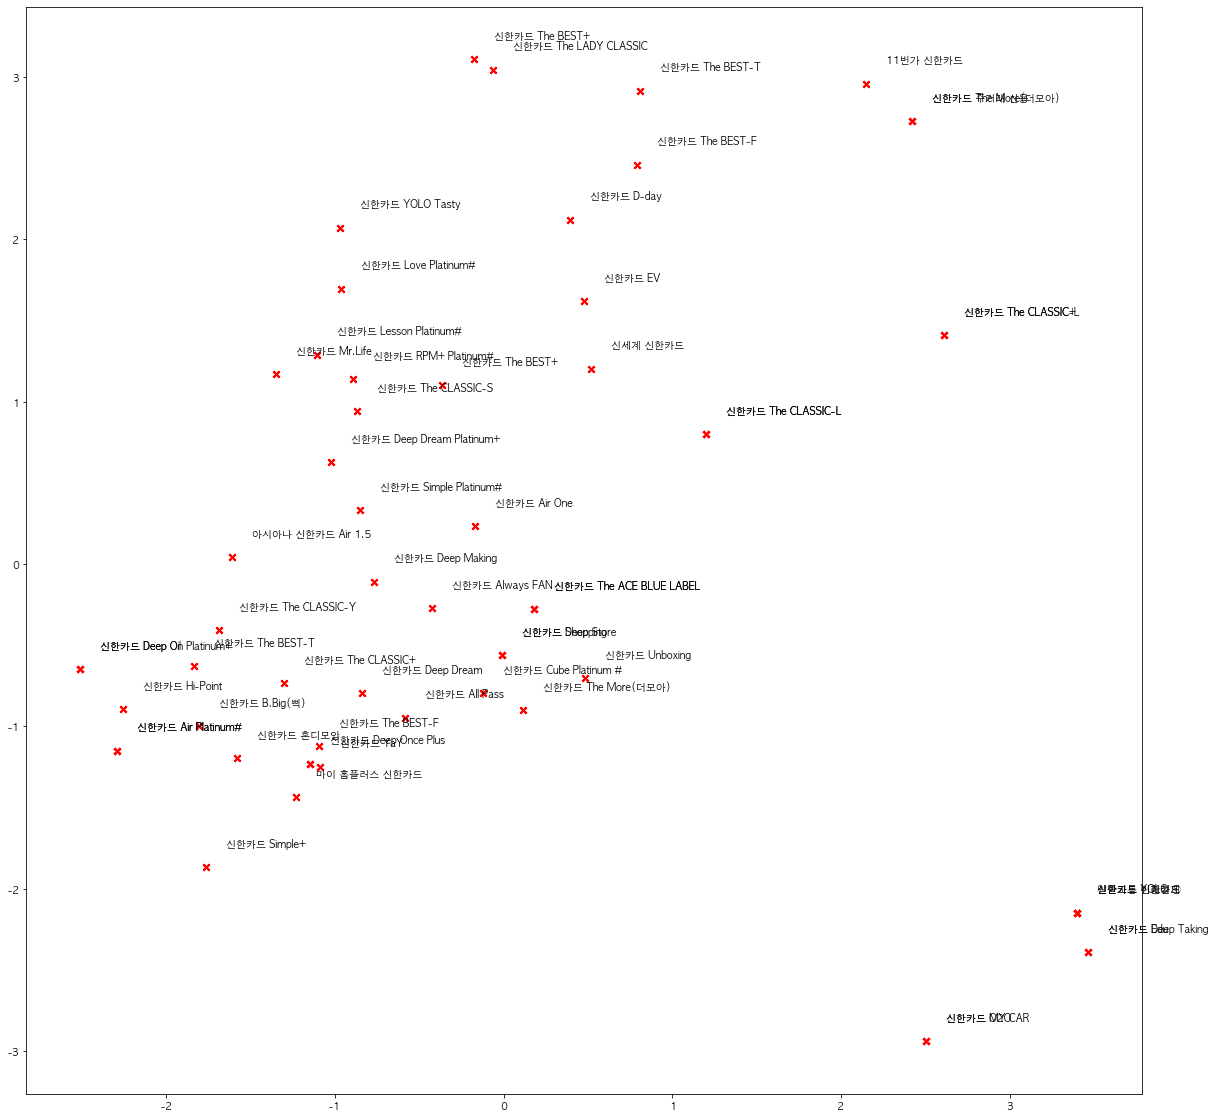

In [232]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
#ax.scatter(tmp['pc1'], tmp['pc2'])

for i, txt in enumerate(tmp.index):
    print(tmp.index[i], name_dict.get(tmp.index[i]))
    ax.annotate(name_dict.get(tmp.index[i]), (tmp['pc1'][i], tmp['pc2'][i]), xytext=(20,20), textcoords='offset points')
    plt.scatter(tmp['pc1'], tmp['pc2'], marker='x', color='red')